<a href="https://colab.research.google.com/github/Found-Bugs/Pengolahan-Citra-Visi-Komputer/blob/Week-5/Gamma_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


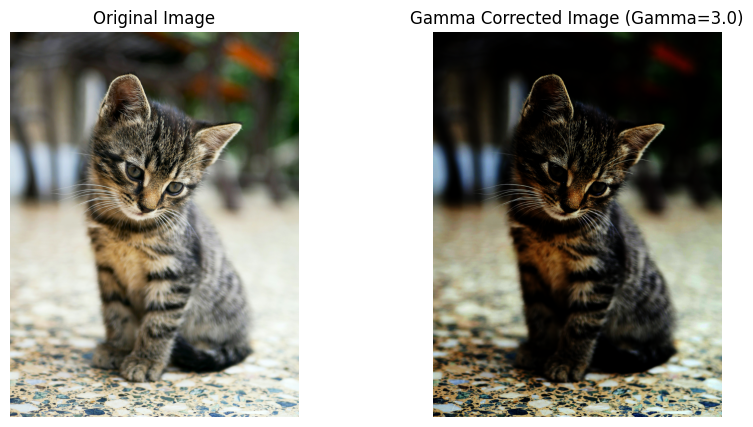

In [67]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply gamma correction
def gamma_correction(image, gamma):
    # Normalize the image to [0, 1]
    normalized_img = image / 255.0
    # Apply gamma correction formula
    corrected_img = np.power(normalized_img, gamma)
    # Rescale back to [0, 255]
    corrected_img = np.uint8(corrected_img * 255)
    return corrected_img

print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0

# Load the image (assuming the image is in the same directory)
# You can change the path to an image file or use a URL to load the image.
image_path = '/content/drive/MyDrive/PCVK/Images/kitten01.jpg'
image = cv2.imread(image_path)

# Convert BGR to RGB (because OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply gamma correction
corrected_image = gamma_correction(image_rgb, gamma)

# Plot the original and gamma corrected images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Gamma Corrected Image (Gamma={gamma})')
plt.imshow(corrected_image)
plt.axis('off')

plt.show()

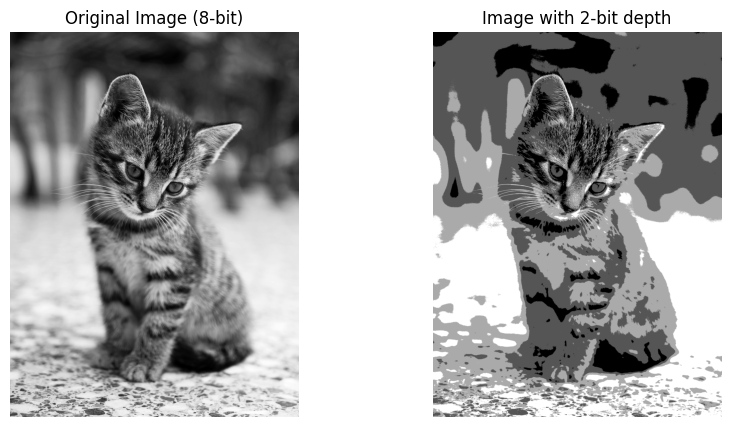

In [68]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Setting bit depth and calculating intensity levels
bit_depth = 2  # You can modify this value for different bit depths
level = 255 / (pow(2, bit_depth) - 1)

# Load the original image in grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg', cv.IMREAD_GRAYSCALE)

# Initialize the new image with same shape as original
depth_image = np.zeros(original.shape, original.dtype)

# Simulating lower bit depth by quantizing the pixel intensities
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

# Displaying the original and bit depth simulated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image (8-bit)')
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Image with {bit_depth}-bit depth')
plt.imshow(depth_image, cmap='gray')
plt.axis('off')

plt.show()

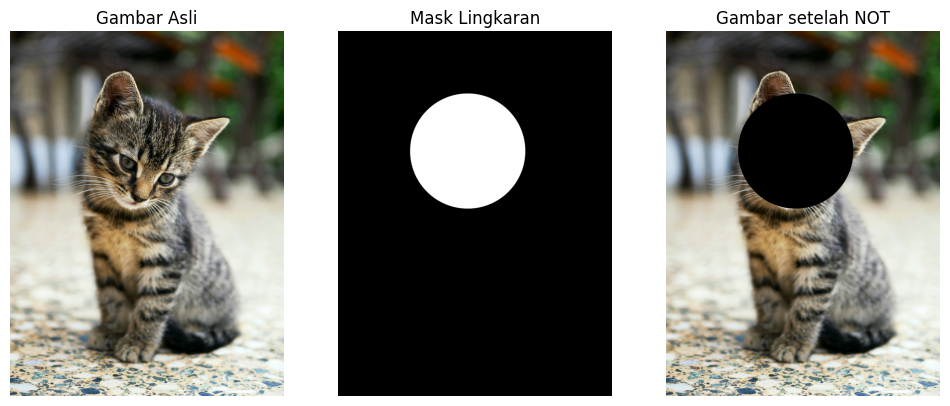

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image_path = '/content/drive/MyDrive/PCVK/Images/kitten01.jpg'
image = cv2.imread(image_path)

# Mengubah gambar ke format RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Membuat mask dengan ukuran yang sama dengan gambar
height, width, _ = image.shape
mask = np.zeros((height, width), dtype=np.uint8)

# Menentukan pusat dan radius lingkaran
center = (1350, 1250)  # Pusat lingkaran di tengah gambar
radius = 600  # Radius lingkaran

# Menggambar lingkaran pada mask
cv2.circle(mask, center, radius, (255), thickness=-1)  # Mask berbentuk lingkaran

# Menggunakan operator NOT untuk membalikkan mask
mask_not = cv2.bitwise_not(mask)

# Menerapkan mask NOT ke gambar asli
masked_image = cv2.bitwise_and(image, image, mask=mask_not)

# Menampilkan gambar asli, mask, dan gambar setelah masking
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Gambar Asli')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask Lingkaran')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gambar setelah NOT')
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

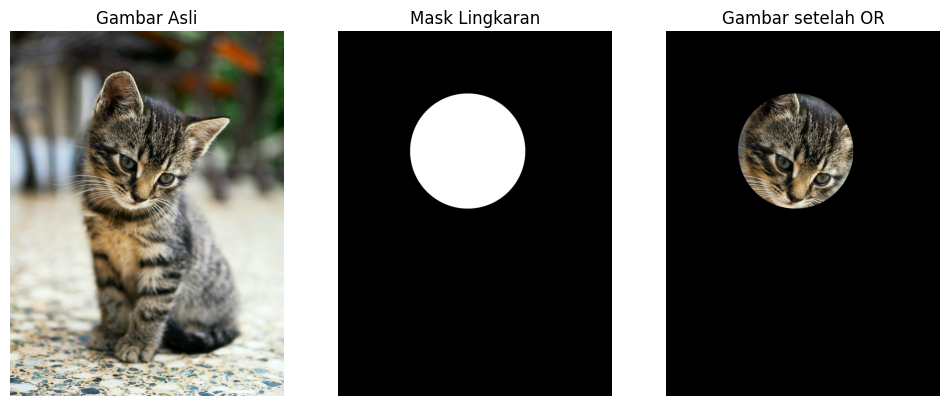

In [70]:
# Menerapkan mask ke gambar asli menggunakan operasi OR
masked_image = cv2.bitwise_or(image, image, mask=mask)

# Menampilkan gambar asli, mask, dan gambar setelah masking
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Gambar Asli')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask Lingkaran')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gambar setelah OR')
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

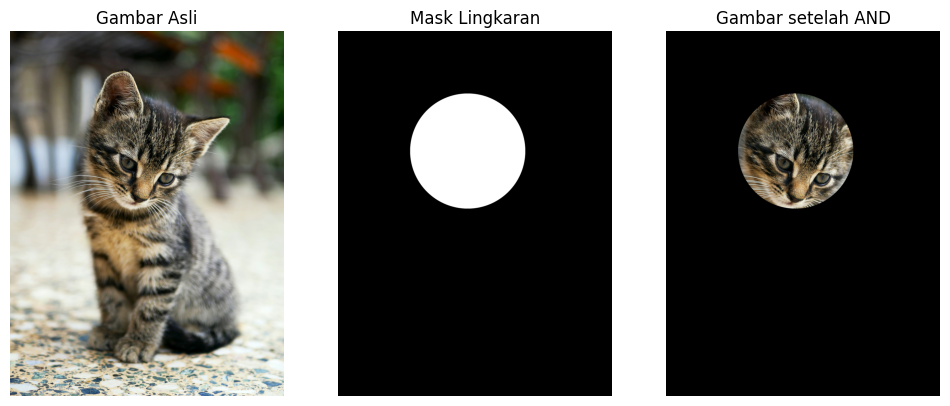

In [71]:
# Menerapkan mask ke gambar asli menggunakan operasi AND
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Menampilkan gambar asli, mask, dan gambar setelah masking
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Gambar Asli')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask Lingkaran')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gambar setelah AND')
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

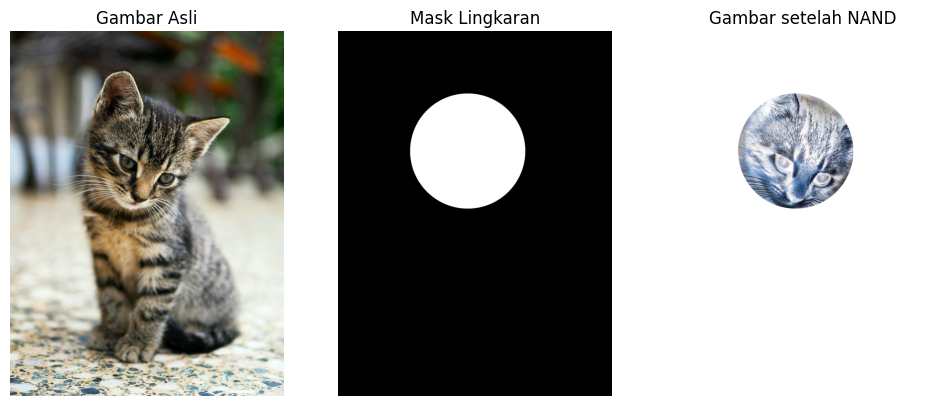

In [72]:
# Menerapkan operasi AND terlebih dahulu
and_image = cv2.bitwise_and(image, image, mask=mask)

# Membalik hasil dari operasi AND untuk mendapatkan NAND (NOT AND)
nand_image = cv2.bitwise_not(and_image)

# Menampilkan gambar asli, mask, dan hasil NAND
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Gambar Asli')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask Lingkaran')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gambar setelah NAND')
plt.imshow(cv2.cvtColor(nand_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

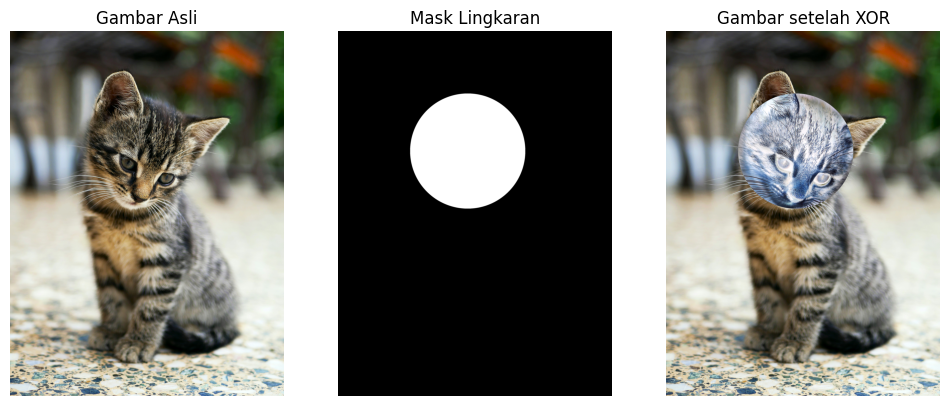

In [73]:
# Menerapkan operasi XOR antara gambar asli dan mask
# Pertama, kita perlu memastikan bahwa mask memiliki 3 channel
mask_3channel = cv2.merge([mask, mask, mask])  # Mengulangi mask untuk 3 channel

# Menggunakan XOR
xor_image = cv2.bitwise_xor(image, mask_3channel)

# Menampilkan gambar asli, mask, dan gambar setelah operasi XOR
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Gambar Asli')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask Lingkaran')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gambar setelah XOR')
plt.imshow(cv2.cvtColor(xor_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()